# Assignment 1

### Instructions
- Download the `banknote_authentication.csv` datasets from Moodle.
- Do **NOT** forget to type in your name and AUBNET After this cell.
- Do **NOT** upload the dataset with your submission.
- **If an assignment contains a copied solution, the entire assignment will be awarded 0 points for all individuals submitting the same solution. Furthermore, any solutions generated by AI tools, will also receive 0 points.**
- Name the assignment as follows: **Ast1_AUBNET.ipynb** . Failure to follow this naming convention will result in the notebook not being graded.

In [2]:
# CMPS 364 - Advanced Machine Learning - Dr. Shady Elbassuoni
# Assignment 1 - Basic ML Review
##############

std_Name='Ralph Mouawad'
std_AubNet='rmm85 - ID 202204667'

### Introduction
In this section, we'll implement a Linear and Logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables.

We train our Linear and logistic regression models to identify forged banknotes. The `banknote_authentication.csv` dataset has been created from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.  

We will train a logistic regression model to distinguish between genuine and forged banknotes given features extarcted from their images.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from joblib import dump, load

## Load the training data

In [5]:
df = pd.read_csv("banknote_authentication.csv")

df = df.drop_duplicates()
df = df.dropna()

df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Split the training data into train (70%), validation (20%) ,Test(10%)

In [6]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
Y = df[['class']]

In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
X_train_1, X_test, Y_train_1, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 7)

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_1, Y_train_1, test_size = (0.2/0.9), random_state = 7)

### Training set has 943 samples so 70% of 1348 samples
### Validation set has 270 samples so 20% of 1348 samples

## Linear Regression Classifier

Train a linear regression classifier using the training set only and use an $L_2$ regularizer. You should set the regularization parameter and any other hyperparemeters of the model using the validation set and a Grid Search. Report the validation accuracy and F-measure of the final selected model.

In [10]:
### Combine train and validation sets for the predefined split of grid search

X_combined = np.concatenate((X_train, X_val), axis = 0)
Y_combined = np.concatenate((Y_train, Y_val), axis = 0)

test_fold = np.concatenate((np.full(X_train.shape[0], -1), np.zeros(X_val.shape[0])), axis = 0)
predefined_split = PredefinedSplit(test_fold)

In [11]:
model_1 = Ridge()
param = {'alpha': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_search_1 = GridSearchCV(model_1, param, cv = predefined_split, scoring = 'neg_mean_squared_error', verbose = 3)

grid_search_1.fit(X_combined, Y_combined)

best_model_1 = grid_search_1.best_estimator_

print(f"Best alpha: {grid_search_1.best_params_['alpha']}")

Fitting 1 folds for each of 7 candidates, totalling 7 fits
[CV 1/1] END ..........................alpha=0;, score=-0.034 total time=   0.0s
[CV 1/1] END .....................alpha=0.0001;, score=-0.034 total time=   0.0s
[CV 1/1] END ......................alpha=0.001;, score=-0.034 total time=   0.0s
[CV 1/1] END .......................alpha=0.01;, score=-0.034 total time=   0.0s
[CV 1/1] END ........................alpha=0.1;, score=-0.034 total time=   0.0s
[CV 1/1] END ..........................alpha=1;, score=-0.034 total time=   0.0s
[CV 1/1] END .........................alpha=10;, score=-0.034 total time=   0.0s
Best alpha: 10


In [12]:
Y_val_pred_1 = best_model_1.predict(X_val)

Y_val_pred_1 = np.round(Y_val_pred_1)

val_acc_1 = accuracy_score(Y_val, Y_val_pred_1)
val_f1_1 = f1_score(Y_val, Y_val_pred_1)

print(f"Validation Accuracy: {val_acc_1}")
print(f"Validation F1 Score: {val_f1_1}")

Validation Accuracy: 0.9777777777777777
Validation F1 Score: 0.9758064516129031


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


## Logistic Regression Classifier

Train a logistic regression classifier using the training set and again use an $L_2$ regularizer. Use your validation set and a Grid Search to optimize the hyperparameters of the model, including the regularization parameter. Report the validation accuracy and F-measure of the final selected model.

In [13]:
model_2 = LogisticRegression(penalty = 'l2')

param_2 = {'C': [0, 0.0001, 0.001, 0.01, 0.1, 1, 10],
           'solver': ['liblinear', 'newton-cg']}

grid_search_2 = GridSearchCV(model_2, param_2, cv = predefined_split, scoring = 'accuracy', verbose = 3)
grid_search_2.fit(X_combined, Y_combined)

best_model_2 = grid_search_2.best_estimator_

print(f"Best C: {grid_search_2.best_params_['C']}")
print(f"Best solver: {grid_search_2.best_params_['solver']}")

Fitting 1 folds for each of 14 candidates, totalling 14 fits
[CV 1/1] END ...............C=0, solver=liblinear;, score=nan total time=   0.0s
[CV 1/1] END ...............C=0, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/1] END ........C=0.0001, solver=liblinear;, score=0.789 total time=   0.0s
[CV 1/1] END ........C=0.0001, solver=newton-cg;, score=0.793 total time=   0.0s
[CV 1/1] END .........C=0.001, solver=liblinear;, score=0.937 total time=   0.0s
[CV 1/1] END .........C=0.001, solver=newton-cg;, score=0.963 total time=   0.0s
[CV 1/1] END ..........C=0.01, solver=liblinear;, score=0.970 total time=   0.0s
[CV 1/1] END ..........C=0.01, solver=newton-cg;, score=0.989 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV 1/1] END ...........C=0.1, solver=liblinear;, score=0.993 total time=   0.0s
[CV 1/1] END ...........C=0.1, solver=newton-cg;, score=0.993 total time=   0.0s
[CV 1/1] END .............C=1, solver=liblinear;, score=0.993 total time=   0.0s
[CV 1/1] END .............C=1, solver=newton-cg;, score=0.993 total time=   0.0s
[CV 1/1] END ............C=10, solver=liblinear;, score=0.993 total time=   0.0s
[CV 1/1] END ............C=10, solver=newton-cg;, score=0.993 total time=   0.0s
Best C: 0.1
Best solver: liblinear


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [14]:
Y_val_pred_2 = best_model_2.predict(X_val)

val_acc_2 = accuracy_score(Y_val, Y_val_pred_2)
val_f1_2 = f1_score(Y_val, Y_val_pred_2)

print(f"Validation Accuracy: {val_acc_2}")
print(f"Validation F1 Score: {val_f1_2}")

Validation Accuracy: 0.9925925925925926
Validation F1 Score: 0.9918032786885246


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## Learning Curve

Choose the best model out of the two models you tried based the validation set and then plot its learning curve and diagnose whether it suffers from high bias or high variance, neither or both.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

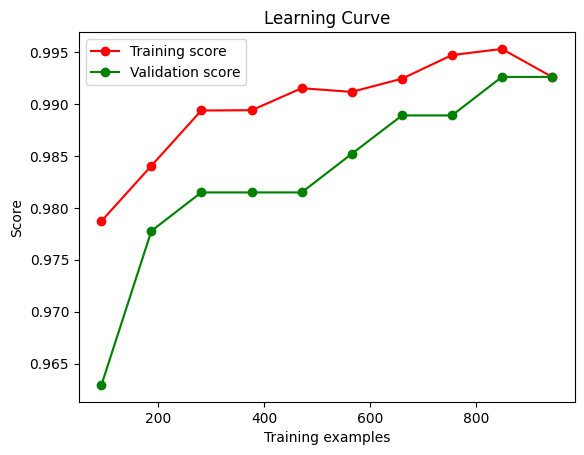

In [16]:
### Logistic Regression performed better
train_sizes, train_scores, val_scores = learning_curve(best_model_2, X_combined, Y_combined, cv = predefined_split,
                                                      n_jobs = 1,
                                                       train_sizes = np.linspace(0.1, 1.0, 10),
                                                       scoring = 'accuracy')
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
val_scores_mean = np.mean(val_scores, axis = 1)
val_scores_std = np.std(val_scores, axis = 1)

### Plotting
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color ='r')
plt.plot(train_sizes, val_scores_mean, 'o-', color = "g", label = "Validation score")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha = 0.1, color ='g')

plt.legend(loc = "best")
plt.show()

#Paste your observations on the learning curve here and justify

Observations: Here we can say that we are not suffering from overfitting or underfitting. In fact, as the training examples increase, the accuracy of both training and validation sets are increasing. At the end both of the scores have almost the same value.
We can also say that there's neither high bias (underfitting) nor high variance (overfitting).  

## Save the best model

Save your best model (check sklearn documentation)

In [17]:
dump(best_model_2, 'best_model.joblib')

['best_model.joblib']

## Testing

Load your saved model from the previous step, and for each test instance predicts its label. Your method should then output the test accuracy and f-measure of your saved model based on the actual labels of the test instances.

In [21]:
model = load('best_model.joblib')
Y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(Y_test, Y_test_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test f1 Score: {test_f1_score}")

Test Accuracy: 1.0
Test f1 Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
